In [17]:
# The code below can be passed over, as it is currently not important, plus it
# uses advanced topics we have not covered yet. LOOK AT PICTURE, MICHAEL!
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)
import pymc3 as pm
from scipy.stats import norm

# Sample data generation

In [18]:
N = 1000

In [29]:
D_x = np.linspace(-5, 5, N)

In [30]:
D_x = np.stack(5*[D_x]).flatten()

In [31]:
def true_function(x):
    return 5*x**2+7

In [38]:
D_y = true_function(D_x) + norm.rvs(scale=2, size=D_x.shape[0])

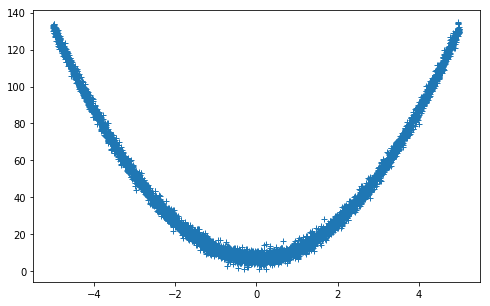

In [39]:
figsize(8, 5)
plt.plot(D_x.flatten(), D_y.flatten(), '+')

Now let's remove some points from around 0 in order to give the possibility to have a order 4 polynomial.

In [40]:
mask_train = (D_x<-2) | (D_x>2)
X_train = D_x[mask_train]
Y_train = D_y[mask_train]

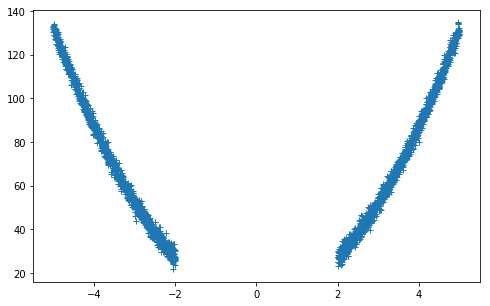

In [41]:
figsize(8, 5)
plt.plot(X_train.flatten(), Y_train.flatten(), '+')

# PyMC3 Model
Build up a pyMC3 model

In [42]:
with pm.Model() as model:
    
    alpha=1e-3
    w1 = pm.Exponential("w1", alpha)
    w2 = pm.Exponential("w2", alpha)
    w3 = pm.Exponential("w3", alpha)
    w4 = pm.Exponential("w4", alpha)
    b = pm.Exponential("b", alpha)
    
    y = X_train*w1+X_train**2*w2+X_train**3*w3+X_train**4*w4 + b
    
    noise = pm.Gamma('noise', alpha=2, beta=1)
    y_observed = pm.Normal('y_observed',
                mu=y,
                sd=noise,
                observed=Y_train)

In [43]:
### Mysterious code to be explained in Chapter 3.
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [noise]
>Metropolis: [b]
>Metropolis: [w4]
>Metropolis: [w3]
>Metropolis: [w2]
>Metropolis: [w1]
Sampling 4 chains: 100%|██████████| 60000/60000 [01:04<00:00, 933.96draws/s] 
The estimated number of effective samples is smaller than 200 for some parameters.


In [44]:
len(trace['b'])

40000

In [59]:
trace['w3']

array([0.00066275, 0.0004873 , 0.00052437, ..., 0.00030095, 0.00020232,
       0.00029077])

Plot histogram of all traces, w3, w4 should have high variance ...

In [45]:
params = ['w1', 'w2', 'w3', 'w4', 'b', 'noise']

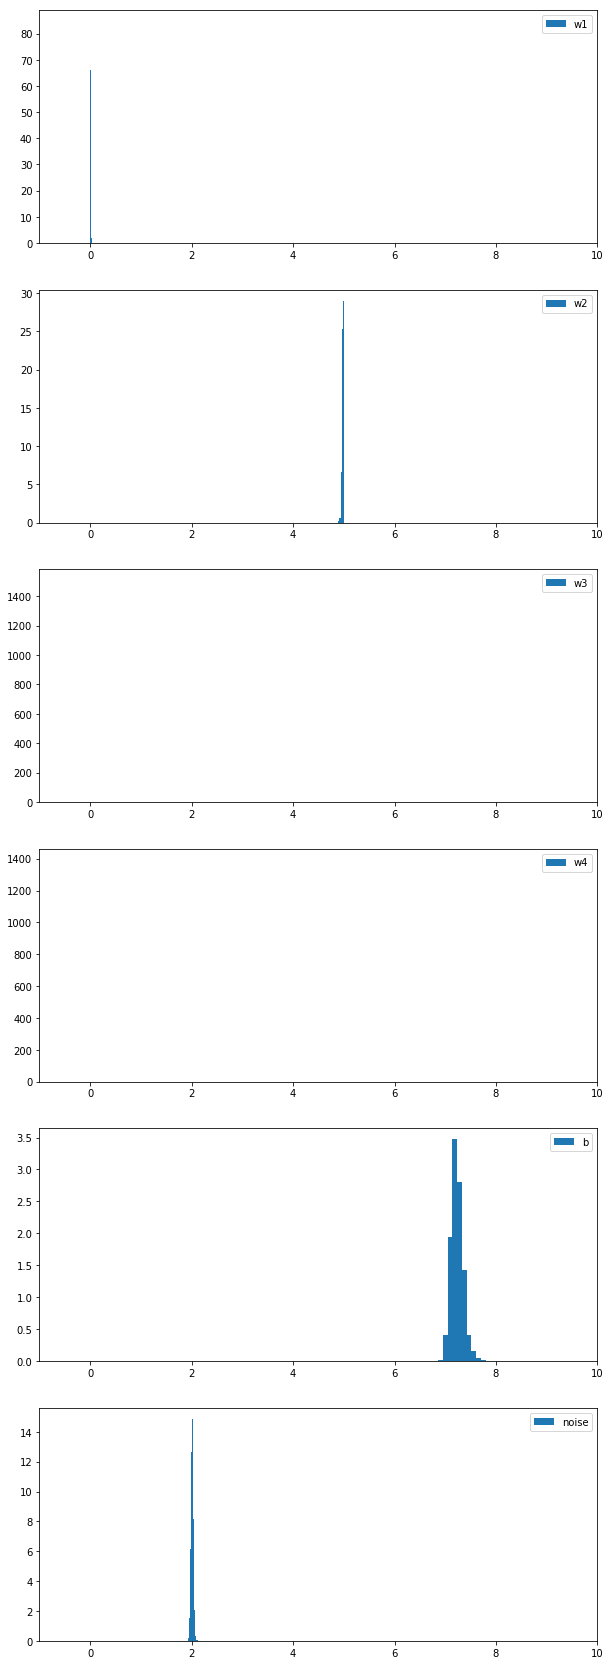

In [58]:
figsize(10, len(params)*5)
fig, ax = plt.subplots(nrows=len(params))
for i, p in enumerate(params):
    ax[i].hist(trace[p], label=p, density=True)
    ax[i].legend(loc=1)
    ax[i].set_xlim([-1, 10])

Plot some possible functions

In [54]:
S=100
idx = np.random.choice(len(trace['b']), size=S, replace=True)
b_samples = trace['b'][idx]
w1_samples = trace['w1'][idx]
w2_samples = trace['w2'][idx]
w3_samples = trace['w3'][idx]
w4_samples = trace['w4'][idx]
noise_samples = trace['noise'][idx]

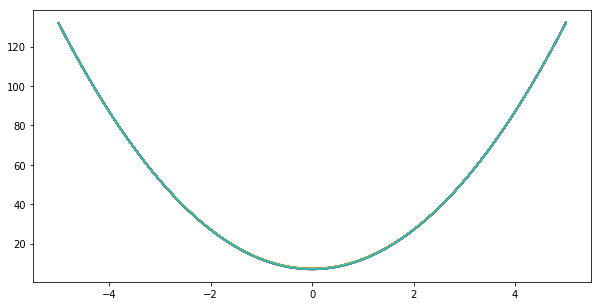

In [55]:
figsize(10, 5)
x_vec = np.linspace(-5,5, 1000)
for i in range(S):
    y_vec = x_vec*w1_samples[i]+x_vec**2*w2_samples[i]+x_vec**3*w3_samples[i]++x_vec**4*w4_samples[i]+ b_samples[i]
    plt.plot(x_vec, y_vec)

Functions look like same ....